In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_merged = pd.read_csv("Main1.csv")
df_merged.drop(columns='Unnamed: 0', inplace=True)
df_merged

,subject_id,Demographics_Delta,Age,Ethnicity,Sex,Race,other,Subject_Died,Death_Days
0,121,0.0,52.0,Unkown,Female,Caucasian,nan nan,Yes,504.0
1,226,0.0,72.0,Unkown,Male,Caucasian,nan nan,Yes,393.0
2,624,0.0,NaN,Unkown,Female,Other,nan nan,Yes,324.0
3,1110,0.0,NaN,Non-Hispanic or Latino,Male,Asian,nan nan,Yes,243.0
4,1333,0.0,55.0,Non-Hispanic or Latino,Female,Caucasian,nan nan,Yes,275.0
...,...,...,...,...,...,...,...,...,...
5038,999217,0.0,54.0,Unkown,Male,Caucasian,nan nan,Yes,57.0
5039,999234,0.0,NaN,Unkown,Female,Other,nan nan,Yes,88.0
5040,999367,0.0,64.0,Unkown,Female,Caucasian,nan nan,Yes,207.0
5041,999649,0.0,56.2,Non-Hispanic or Latino,Male,Caucasian,nan nan,No,NaN


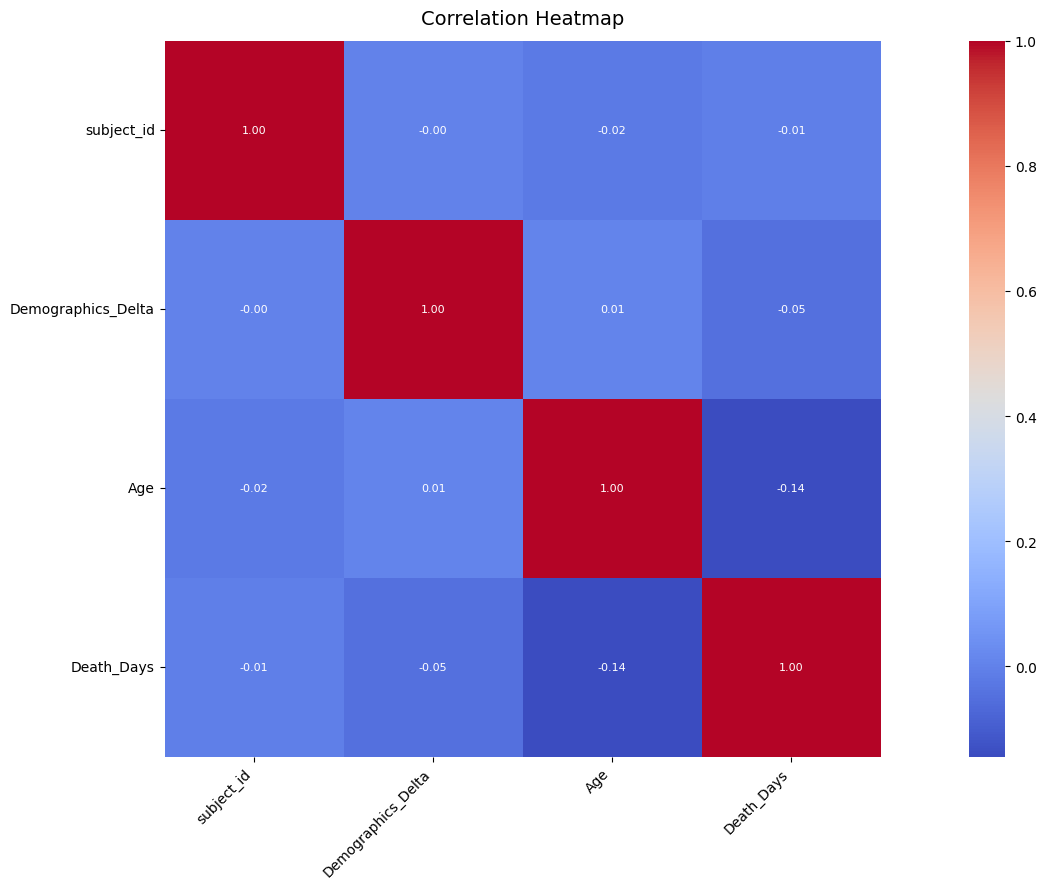

In [4]:
corr = df_merged.select_dtypes(include='number').corr()

plt.figure(figsize=(18,9))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 8},   
    cmap='coolwarm',
    fmt=".2f",
    square=True
)
plt.title("Correlation Heatmap", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [5]:
df_merged.isnull().sum()

subject_id               0
Demographics_Delta      84
Age                   1324
Ethnicity                0
Sex                      0
Race                     0
other                    0
Subject_Died             0
Death_Days            1507
dtype: int64

# 🧩 Converting Categorical Values to Numeric (`Yes` / `No` → `1` / `0`)

In [6]:
def replace(row):
    if row=='Yes':
        return 1
    elif row=='No':
        return 0
df_merged['Subject_Died']=df_merged['Subject_Died'].apply(replace)

In [7]:
df_merged

,subject_id,Demographics_Delta,Age,Ethnicity,Sex,Race,other,Subject_Died,Death_Days
0,121,0.0,52.0,Unkown,Female,Caucasian,nan nan,1,504.0
1,226,0.0,72.0,Unkown,Male,Caucasian,nan nan,1,393.0
2,624,0.0,NaN,Unkown,Female,Other,nan nan,1,324.0
3,1110,0.0,NaN,Non-Hispanic or Latino,Male,Asian,nan nan,1,243.0
4,1333,0.0,55.0,Non-Hispanic or Latino,Female,Caucasian,nan nan,1,275.0
...,...,...,...,...,...,...,...,...,...
5038,999217,0.0,54.0,Unkown,Male,Caucasian,nan nan,1,57.0
5039,999234,0.0,NaN,Unkown,Female,Other,nan nan,1,88.0
5040,999367,0.0,64.0,Unkown,Female,Caucasian,nan nan,1,207.0
5041,999649,0.0,56.2,Non-Hispanic or Latino,Male,Caucasian,nan nan,0,NaN


<Axes: xlabel='Death_Days', ylabel='Count'>

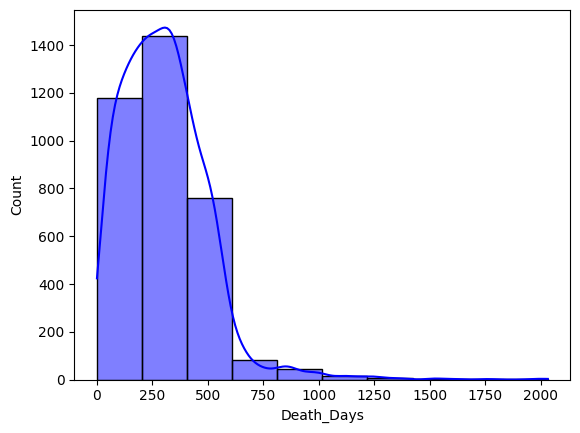

In [8]:
sns.histplot(df_merged['Death_Days'].dropna(), kde=True, color='blue', bins=10)

In [9]:
df_alsfrs=pd.read_csv('/home/amitdubey/cs229/Dataset/2025_05_27_PROACT_ALL_FORMS/PROACT_ALSFRS.csv')
df_alsfrs.isnull().sum()

subject_id                             0
Q1_Speech                           1303
Q2_Salivation                       1305
Q3_Swallowing                       1306
Q4_Handwriting                      1309
Q5a_Cutting_without_Gastrostomy     6724
Q5b_Cutting_with_Gastrostomy       67634
Q6_Dressing_and_Hygiene             1309
Q7_Turning_in_Bed                   1313
Q8_Walking                          1309
Q9_Climbing_Stairs                  1307
Q10_Respiratory                    37461
ALSFRS_Delta                         188
ALSFRS_Total                       37460
ALSFRS_R_Total                     29278
R_1_Dyspnea                        30570
R_2_Orthopnea                      30570
R_3_Respiratory_Insufficiency      30568
Mode_of_Administration             66443
ALSFRS_Responded_By                71860
dtype: int64

In [10]:
df_alsfrs

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Delta,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,Mode_of_Administration,ALSFRS_Responded_By
0,121,4.0,4.0,4.0,3.0,3.0,NaN,4.0,2.0,4.0,4.0,4.0,0.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
1,121,4.0,4.0,4.0,3.0,3.0,NaN,3.0,3.0,4.0,3.0,4.0,28.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
2,121,4.0,4.0,4.0,3.0,3.0,NaN,3.0,3.0,4.0,4.0,4.0,56.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
3,121,4.0,4.0,4.0,3.0,3.0,NaN,3.0,3.0,4.0,3.0,4.0,84.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121,4.0,4.0,4.0,3.0,3.0,NaN,2.0,4.0,4.0,3.0,4.0,116.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73840,999882,4.0,4.0,4.0,3.0,2.0,NaN,2.0,4.0,3.0,3.0,4.0,147.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN
73841,999882,4.0,4.0,4.0,2.0,2.0,NaN,2.0,4.0,3.0,2.0,4.0,168.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
73842,999882,4.0,4.0,4.0,3.0,2.0,NaN,2.0,4.0,3.0,3.0,4.0,203.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN
73843,999882,4.0,4.0,4.0,2.0,2.0,NaN,2.0,3.0,3.0,4.0,4.0,224.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Aggregation by Subject ID

## Overview
This code aggregates multiple measurements per subject into a single row by taking the **median** of numeric columns and the **first occurrence** of non-numeric columns.

## Problem Statement
The dataset contains multiple rows per `subject_id` (longitudinal measurements), but for analysis we need exactly one row per subject since `subject_id` is the primary key.



In [11]:
numeric_cols = df_alsfrs.select_dtypes(include='number').columns.tolist()
agg_dict = {
    col: ('median' if col in numeric_cols else 'first')
    for col in df_alsfrs.columns if col != 'subject_id'
}

df_agg = df_alsfrs.groupby('subject_id').agg(agg_dict).reset_index()
df_agg[numeric_cols] = df_agg[numeric_cols].round(2)

df_agg

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Delta,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,Mode_of_Administration,ALSFRS_Responded_By
0,121,4.0,4.0,4.0,2.5,3.0,NaN,2.0,2.5,4.0,2.5,4.0,145.5,33.5,NaN,NaN,NaN,NaN,None,None
1,226,0.0,0.0,3.0,4.0,4.0,0.5,4.0,4.0,4.0,4.0,4.0,121.0,30.0,NaN,NaN,NaN,NaN,None,None
2,666,2.5,4.0,3.0,3.0,1.0,NaN,1.5,1.0,2.0,0.0,2.0,137.5,19.0,24.5,1.0,2.5,4.0,None,None
3,671,3.0,3.0,3.0,3.0,3.0,NaN,3.0,4.0,3.0,3.0,3.0,32.0,32.0,NaN,NaN,NaN,NaN,None,None
4,935,4.0,4.0,4.0,4.0,3.0,NaN,3.0,3.0,2.0,2.0,NaN,75.0,NaN,39.0,4.0,4.0,4.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8533,999492,3.0,4.0,3.0,3.0,2.5,NaN,2.0,2.5,2.0,1.0,NaN,127.0,NaN,35.0,4.0,4.0,4.0,None,None
8534,999649,1.0,0.0,2.0,2.5,1.0,NaN,1.0,1.0,2.0,1.0,NaN,75.0,NaN,22.0,3.0,4.0,4.0,None,None
8535,999836,4.0,4.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,1.0,NaN,158.0,NaN,38.0,4.0,4.0,4.0,None,None
8536,999850,3.0,3.0,2.0,3.0,1.0,NaN,1.5,2.5,2.0,0.5,NaN,111.5,NaN,25.0,4.0,0.0,2.0,In Person,None


In [12]:
df_merge = pd.merge(df_merged, df_agg, on='subject_id', how='outer', suffixes=('_left', '_right'))

In [13]:
df_merge

,subject_id,Demographics_Delta,Age,Ethnicity,Sex,Race,other,Subject_Died,Death_Days,Q1_Speech,...,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Delta,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,Mode_of_Administration,ALSFRS_Responded_By
0,121,0.0,52.0,Unkown,Female,Caucasian,nan nan,1.0,504.0,4.0,...,2.5,4.0,145.5,33.5,NaN,NaN,NaN,NaN,None,None
1,226,0.0,72.0,Unkown,Male,Caucasian,nan nan,1.0,393.0,0.0,...,4.0,4.0,121.0,30.0,NaN,NaN,NaN,NaN,None,None
2,624,0.0,NaN,Unkown,Female,Other,nan nan,1.0,324.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,...,0.0,2.0,137.5,19.0,24.5,1.0,2.5,4.0,None,None
4,671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,3.0,3.0,32.0,32.0,NaN,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,999492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,1.0,NaN,127.0,NaN,35.0,4.0,4.0,4.0,None,None
10095,999649,0.0,56.2,Non-Hispanic or Latino,Male,Caucasian,nan nan,0.0,NaN,1.0,...,1.0,NaN,75.0,NaN,22.0,3.0,4.0,4.0,None,None
10096,999836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,1.0,NaN,158.0,NaN,38.0,4.0,4.0,4.0,None,None
10097,999850,0.0,67.0,Non-Hispanic or Latino,Male,Caucasian,nan nan,1.0,239.0,3.0,...,0.5,NaN,111.5,NaN,25.0,4.0,0.0,2.0,In Person,None


In [14]:
df_merge.isnull().sum()

subject_id                            0
Demographics_Delta                 5140
Age                                6380
Ethnicity                          5056
Sex                                5056
Race                               5056
other                              5056
Subject_Died                       5056
Death_Days                         6563
Q1_Speech                          1886
Q2_Salivation                      1886
Q3_Swallowing                      1886
Q4_Handwriting                     1886
Q5a_Cutting_without_Gastrostomy    1992
Q5b_Cutting_with_Gastrostomy       8501
Q6_Dressing_and_Hygiene            1886
Q7_Turning_in_Bed                  1886
Q8_Walking                         1886
Q9_Climbing_Stairs                 1886
Q10_Respiratory                    5957
ALSFRS_Delta                       1556
ALSFRS_Total                       5957
ALSFRS_R_Total                     4658
R_1_Dyspnea                        4988
R_2_Orthopnea                      4988


In [15]:
def sex_to_numeric(row):
    if row['Sex'] == 'Male':
        return 1
    elif row['Sex'] == 'Female':
        return 0

df_merge['Sex'] = df_merge.apply(sex_to_numeric, axis=1)

In [16]:
df_merge['Race'].fillna('Unknown or Not provided',inplace=True)

/tmp/ipykernel_8398/1589625877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge['Race'].fillna('Unknown or Not provided',inplace=True)


## Iterative Imputer with Random Forest in scikit-learn And XGBOOST

In this step, we are importing the tools needed to fill in missing data.  
We will use the **Iterative Imputer** along with a **Random Forest Regressor**  and  **XGBOOST** to predict and replace missing values in our dataset.


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRegressor ,XGBClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix

In [18]:
df_impute = df_merge

# Select only numeric columns
numeric_cols = df_impute.select_dtypes(include='number').columns

# Initialize imputer
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    initial_strategy='median',
    random_state=42
)

# Fit and transform - IMPORTANT: save the result!
imputed_array = imputer.fit_transform(df_impute[numeric_cols])

# Convert back to DataFrame with original column names and index
df_imputed = pd.DataFrame(
    imputed_array, 
    columns=numeric_cols,
    index=df_impute.index
)

# Combine with non-numeric columns
non_numeric_cols = df_impute.select_dtypes(exclude='number')
df_final = pd.concat([df_imputed, non_numeric_cols], axis=1)


print(f"Missing values before: {df_impute[numeric_cols].isnull().sum().sum()}")
print(f"Missing values after: {df_imputed.isnull().sum().sum()}")

Missing values before: 86868
Missing values after: 0


In [19]:
df_impute1 = df_merge
numeric_cols = df_impute1.select_dtypes(include='number').columns
imputer1 = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, random_state=42, tree_method='hist'),
    max_iter=10,
    initial_strategy='median',
    random_state=42
)

imputed_array = imputer1.fit_transform(df_impute[numeric_cols])

# Convert back to DataFrame with original column names and index
df_imputed1 = pd.DataFrame(
    imputed_array, 
    columns=numeric_cols,
    index=df_impute1.index
)

# Combine with non-numeric columns
non_numeric_cols = df_impute1.select_dtypes(exclude='number')
df_final1 = pd.concat([df_imputed1, non_numeric_cols], axis=1)



print(f"Missing values before: {df_impute1[numeric_cols].isnull().sum().sum()}")
print(f"Missing values after: {df_imputed1.isnull().sum().sum()}")

Missing values before: 86868
Missing values after: 0


## Comparison of Iterative Imputers (Random Forest vs XGBoost)

We applied **Iterative Imputer** from `scikit-learn` using two different estimators —  
**Random Forest Regressor** and **XGBoost Regressor** — to handle missing values in the dataset.

To objectively compare their performance, we simulated missingness in the `Subject_Died` column  
and measured how accurately each imputer could recover the true values.

### 🔍 Evaluation Metrics
- **RMSE (Root Mean Squared Error):** Lower values indicate better prediction accuracy.
- **MAE (Mean Absolute Error):** Measures average absolute difference between true and imputed values.
- **R² (Coefficient of Determination):** Higher values show better fit.
- **Accuracy:** Used here because `Subject_Died` is a binary variable (0/1).

### 📊 Results Summary
| Metric | Random Forest | XGBoost | Better |
|:--|:--:|:--:|:--:|
| **RMSE** | 0.1610 | **0.1431** | ✅ XGBoost |
| **MAE** | 0.0749 | **0.0714** | ✅ XGBoost |
| **R²** | 0.8629 | **0.8916** | ✅ XGBoost |
| **Accuracy** | 0.9813 | **0.9876** | ✅ XGBoost |

### ✅ Conclusion
Both imputers performed well, but **XGBoost-based Iterative Imputer** achieved slightly better  
results across all metrics, indicating it handles missingness in `Subject_Died` more effectively.


In [20]:
# Round continuous predictions back to 0/1 and convert to int
df_final1['Subject_Died'] = df_final1['Subject_Died'].round().astype(int)
df_final1

,subject_id,Demographics_Delta,Age,Sex,Subject_Died,Death_Days,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,...,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,Ethnicity,Race,other,Mode_of_Administration,ALSFRS_Responded_By
0,121.0,0.000000,52.000000,0.000000,1,504.000000,4.000000,4.000000,4.000000,2.500000,...,33.500000,40.669403,3.625171,4.018143,3.837584,Unkown,Caucasian,nan nan,None,None
1,226.0,0.000000,72.000000,1.000000,1,393.000000,0.000000,0.000000,3.000000,4.000000,...,30.000000,36.639004,3.855055,3.176010,3.248594,Unkown,Caucasian,nan nan,None,None
2,624.0,0.000000,64.531136,0.000000,1,324.000000,3.284645,3.694695,3.565957,3.006144,...,25.167795,32.983414,3.721457,3.563428,3.928707,Unkown,Other,nan nan,NaN,NaN
3,666.0,0.002369,53.044510,0.324510,0,307.669128,2.500000,4.000000,3.000000,3.000000,...,19.000000,24.500000,1.000000,2.500000,4.000000,NaN,Unknown or Not provided,NaN,None,None
4,671.0,-0.000960,54.991268,0.666395,1,217.020706,3.000000,3.000000,3.000000,3.000000,...,32.000000,39.734123,3.655972,3.746583,3.975100,NaN,Unknown or Not provided,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,999492.0,-0.007484,47.137741,0.527253,1,313.717468,3.000000,4.000000,3.000000,3.000000,...,27.181150,35.000000,4.000000,4.000000,4.000000,NaN,Unknown or Not provided,NaN,None,None
10095,999649.0,0.000000,56.200000,1.000000,0,255.899887,1.000000,0.000000,2.000000,2.500000,...,14.557564,22.000000,3.000000,4.000000,4.000000,Non-Hispanic or Latino,Caucasian,nan nan,None,None
10096,999836.0,0.006940,54.293499,0.540550,1,398.217438,4.000000,4.000000,4.000000,3.000000,...,30.327686,38.000000,4.000000,4.000000,4.000000,NaN,Unknown or Not provided,NaN,None,None
10097,999850.0,0.000000,67.000000,1.000000,1,239.000000,3.000000,3.000000,2.000000,3.000000,...,22.152987,25.000000,4.000000,0.000000,2.000000,Non-Hispanic or Latino,Caucasian,nan nan,In Person,None


<Axes: >

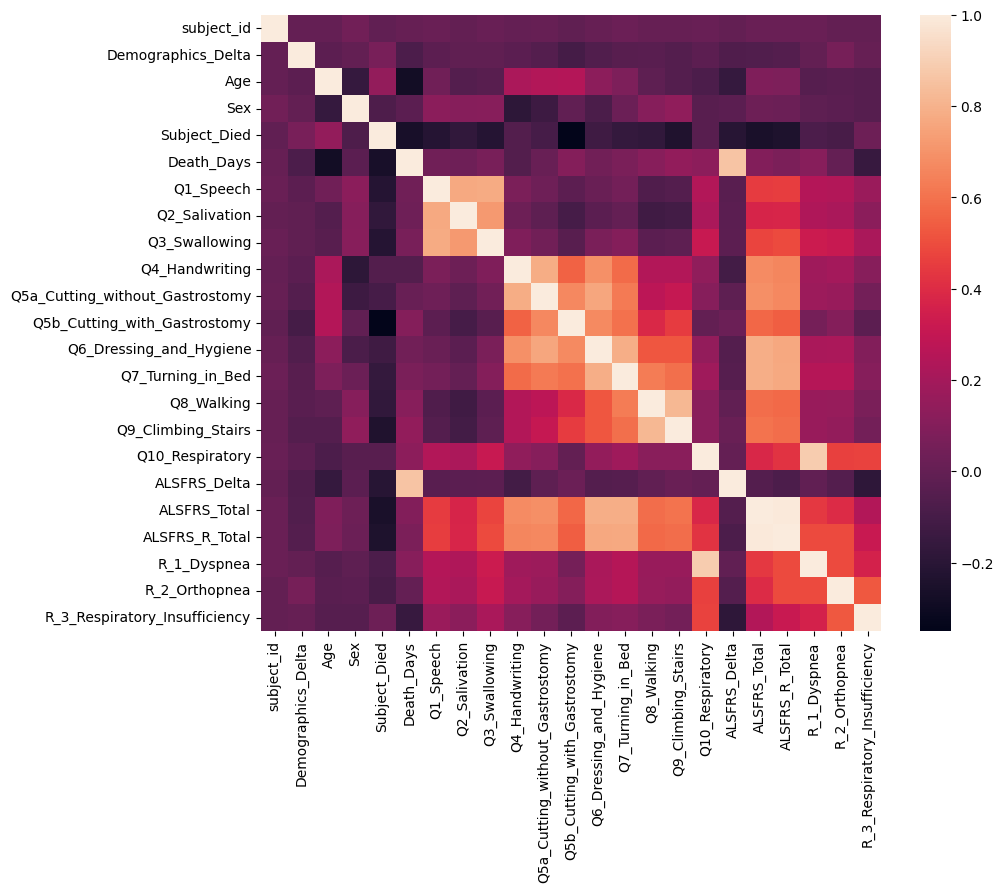

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final1.select_dtypes(include='number').corr())